# Natural Language Processing Project

In this project you will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews. 

## 1.Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2.The Data

In [2]:
df = pd.read_csv('yelp.csv')

In [3]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
stars,10000.0,3.7775,1.214636,1.0,3.0,4.0,5.0,5.0
cool,10000.0,0.8768,2.067861,0.0,0.0,0.0,1.0,77.0
useful,10000.0,1.4093,2.336647,0.0,0.0,1.0,2.0,76.0
funny,10000.0,0.7013,1.907942,0.0,0.0,0.0,1.0,57.0


**Creating a new column called "text length" which is the number of words in the text column.**

In [6]:
df['text length'] = df['text'].apply(len)

# 3.EDA

**Creating a grid of 5 histograms of text length based off of the star ratings**

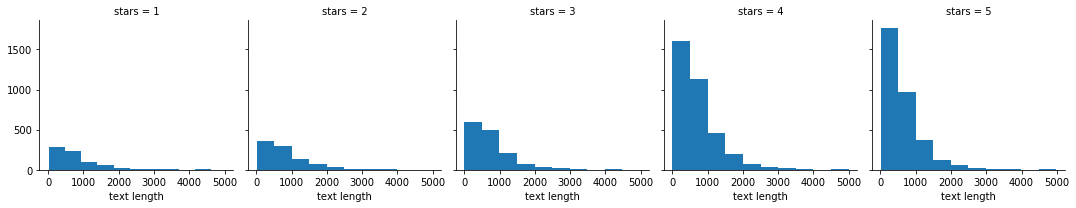

In [7]:
g = sns.FacetGrid(df,col='stars')
g.map(plt.hist,'text length')

**Creating a boxplot of text length for each star category.**

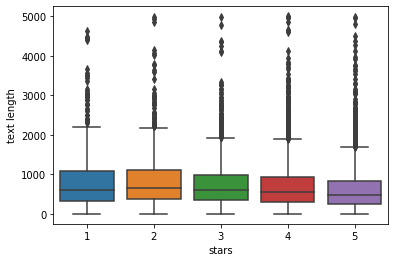

In [8]:
sns.boxplot(data=df,x='stars',y='text length')

**Creating a countplot of the number of occurrences for each type of star rating.**

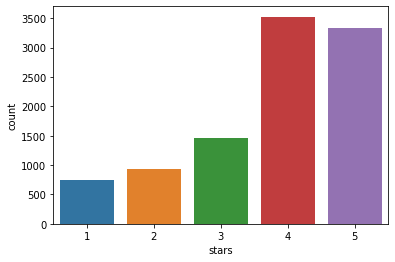

In [9]:
sns.countplot(data=df,x='stars')

**Using groupby to get the mean values of the numerical columns**

In [10]:
stars = df.groupby('stars').mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


**Using the corr() method on that groupby dataframe to produce this dataframe:**

In [11]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


**Creating a heatmap based off that .corr() dataframe:**

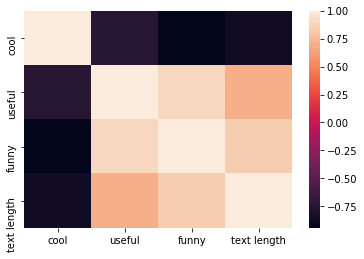

In [12]:
sns.heatmap(stars.corr())

## 4.NLP Classification Task

**Creating a dataframe that contains the columns of dataframe but for only the 1 or 5 star reviews.**

In [13]:
df_1 = df[(df['stars']==1)|(df['stars']==5)]

**Creating two objects X and y. X will be the 'text' column of df_1 and y will be the 'stars' column of df_1**

In [14]:
X = df_1['text']
y=df_1['stars']

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
count = CountVectorizer()

In [17]:
X = count.fit_transform(X)

## 6.Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## 7.Training a Model

In [20]:
from sklearn.naive_bayes import MultinomialNB

In [21]:
nb = MultinomialNB()

**Now fit nb using the training data.**

In [22]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## 8.Predictions and Evaluations

In [23]:
predictions = nb.predict(X_test)

**Creating a confusion matrix and classification report using these predictions and y_test**

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
print('CLASSIFICATION REPORT \n')
print(classification_report(y_test,predictions))
print('CONFUSION MATRIX \n')
print(confusion_matrix(y_test,predictions))

CLASSIFICATION REPORT 

              precision    recall  f1-score   support

           1       0.84      0.62      0.71       261
           5       0.92      0.97      0.94      1088

    accuracy                           0.90      1349
   macro avg       0.88      0.80      0.83      1349
weighted avg       0.90      0.90      0.90      1349

CONFUSION MATRIX 

[[ 163   98]
 [  32 1056]]


# 9.Using Text Processing

In [26]:
from sklearn.feature_extraction.text import TfidfTransformer

In [27]:
from sklearn.pipeline import Pipeline

**Creating a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [28]:
pipeline = Pipeline([
    ('bow',CountVectorizer()),
    ('tfid',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

## 10.Using the Pipeline

### Train Test Split

**Redo the train test split on the df_1 object.**

In [29]:
X = df_1['text']
y=df_1['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Fitting New Test/Train data into pipeline**

In [30]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfid',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

### 11.Predictions and Evaluation

In [31]:
pipe_pred = pipeline.predict(X_test)

In [32]:
print('CLASSIFICATION REPORT \n')
print(classification_report(y_test,pipe_pred))
print('CONFUSION MATRIX \n')
print(confusion_matrix(y_test,pipe_pred))

CLASSIFICATION REPORT 

              precision    recall  f1-score   support

           1       1.00      0.00      0.01       261
           5       0.81      1.00      0.89      1088

    accuracy                           0.81      1349
   macro avg       0.90      0.50      0.45      1349
weighted avg       0.84      0.81      0.72      1349

CONFUSION MATRIX 

[[   1  260]
 [   0 1088]]
